<img alt="QuantRocket logo" src="https://www.quantrocket.com/assets/img/notebook-header-logo.png">

<a href="https://www.quantrocket.com/disclaimer/">Disclaimer</a>

# Trend Strategy

The rules for the trend strategy as outlined in the Alpha Architect white paper are:

* take a 50% short position whenever the 12-month US market return is below the 12-month Treasury bill return
* take a 50% short position whenever the US market return is below its 12-month moving average

The strategy can be flat, 50% short, or 100% short, depending on which rules trigger. For simplicity, we'll modify the first rule to go short when the market is below 0, rather than below the T-bill return.

## Strategy code

The file [vmot_trend.py](vmot_trend.py) contains the strategy code. The highlights are shown below. First, we get a boolean DataFrame of times when the market is below 0:

```python
one_year_returns = (closes - closes.shift(252))/closes.shift(252)
market_below_zero = one_year_returns < 0        
```

Then we get a boolean DataFrame of times when the market is below its moving average:

```python
mavgs = closes.rolling(window=252).mean()
market_below_mavg = closes < mavgs
```
   
We convert these two boolean DataFrames to integers, add them, and negate them to get a DataFrame of 0, -1, or -2, indicating how many hedge signals triggered. 

```python
hedge_signals = market_below_zero.astype(int) + market_below_mavg.astype(int)
hedge_signals = -hedge_signals
```

Then, in `signals_to_target_weights`, we divide the signals by two to get a DataFrames of target weights consisting of 0 (not hedged), -0.5 (50% hedged), and -1 (100% hedged).

```python
weights = signals / 2
```
        
We also include code to rebalance the hedge weekly, rather than daily.

## Install strategy file

Execute the following cell to "install" the strategy by moving the file to the `/codeload/moonshot` directory: 

In [1]:
# make directory if doesn't exist
!mkdir -p /codeload/moonshot

!mv vmot_trend.py /codeload/moonshot/

## Run backtest

Before running the full VMOT backtest, we can run a backtest on just the trend strategy:

In [2]:
from quantrocket.moonshot import backtest
backtest("vmot-trend", filepath_or_buffer="vmot_trend_backtest.csv")

The tear sheet shows that the strategy loses money over time but made significant gains during the bear markets. The full VMOT backtest will help us decide whether this is a worthwhile tradeoff in the context of our portfolio.

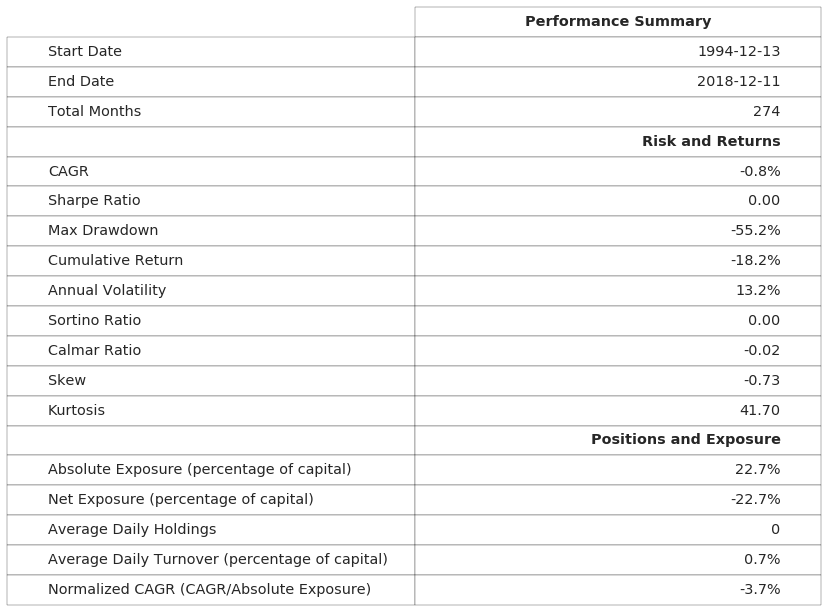

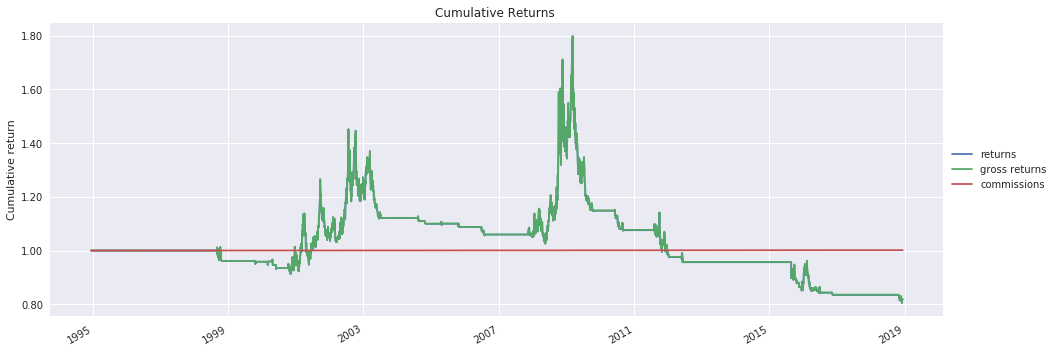

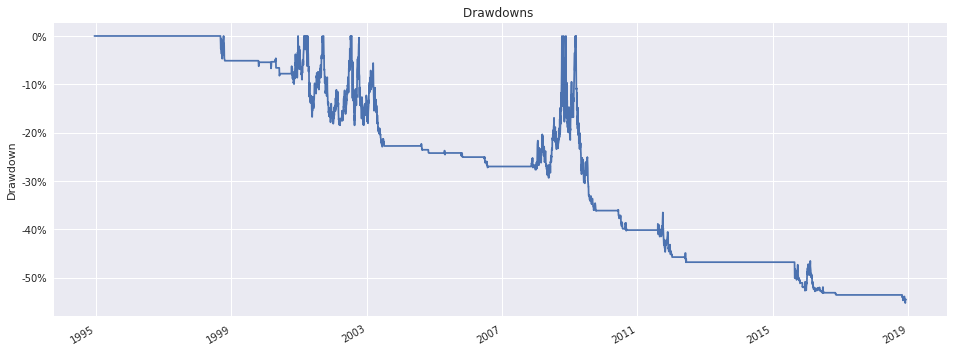

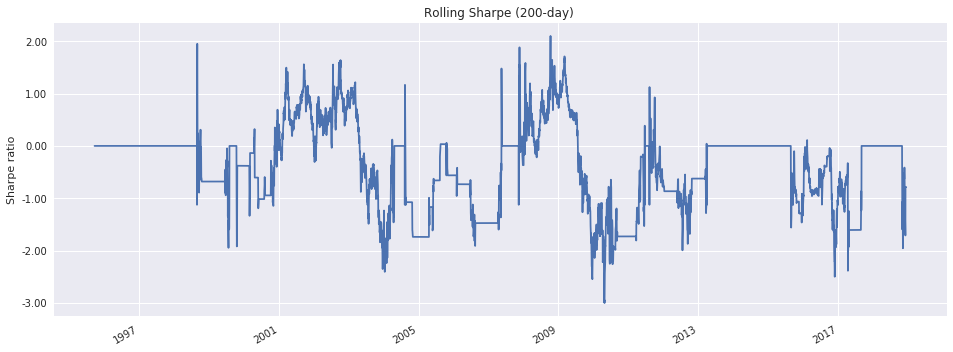

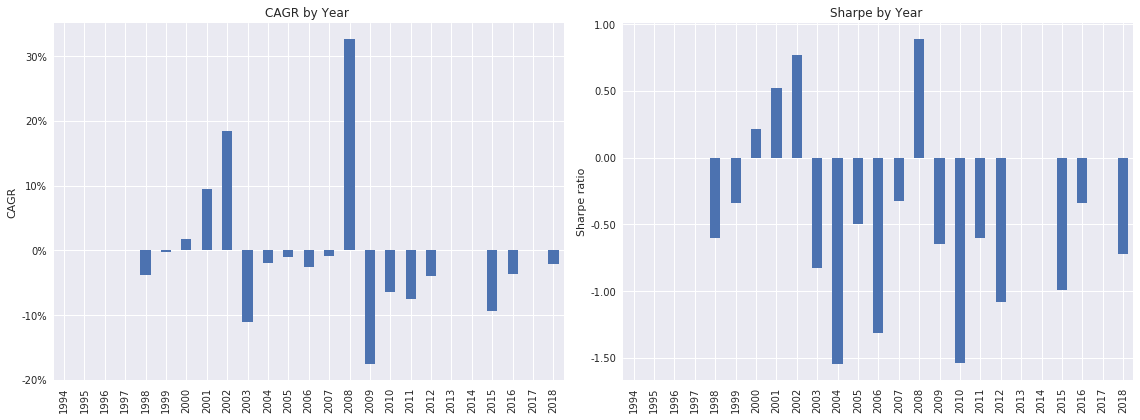

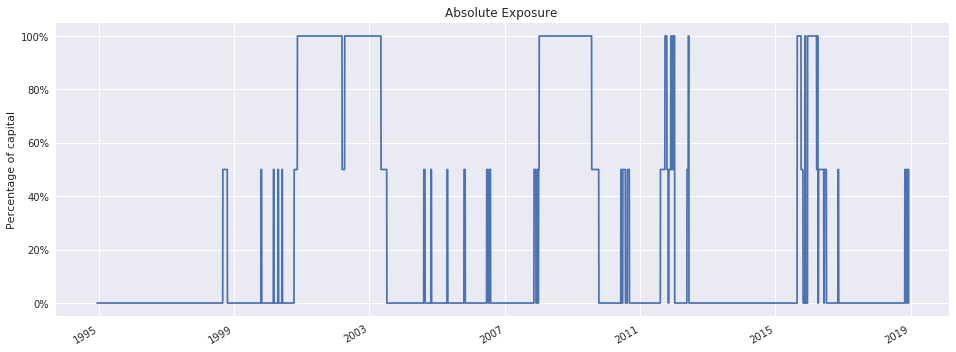

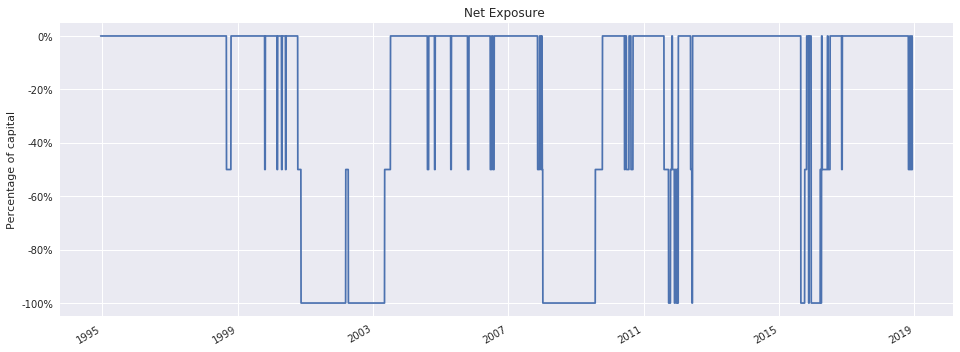

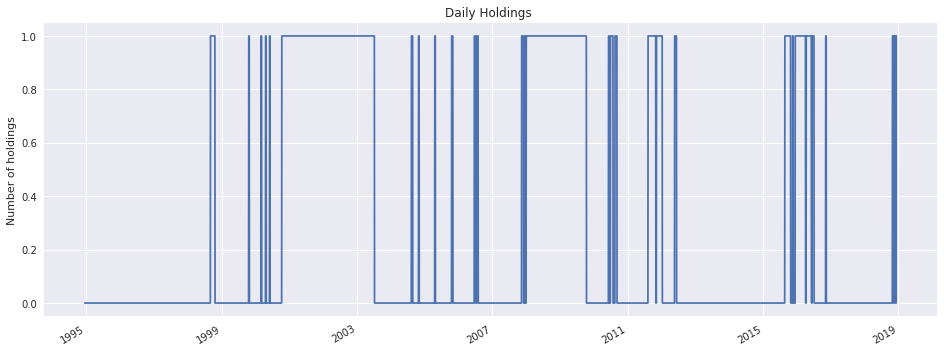

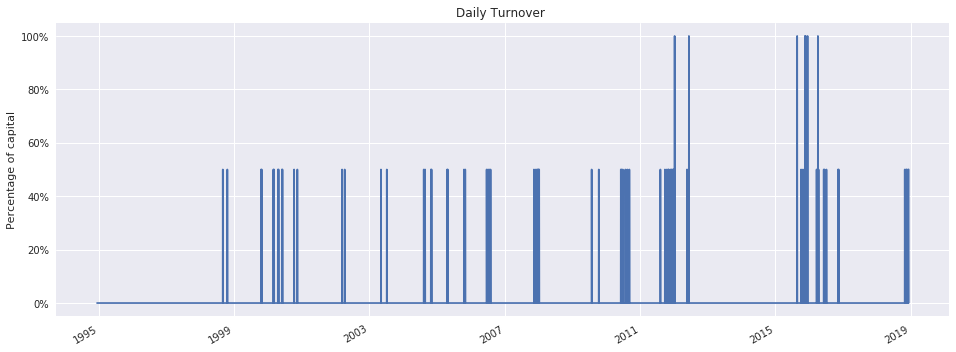

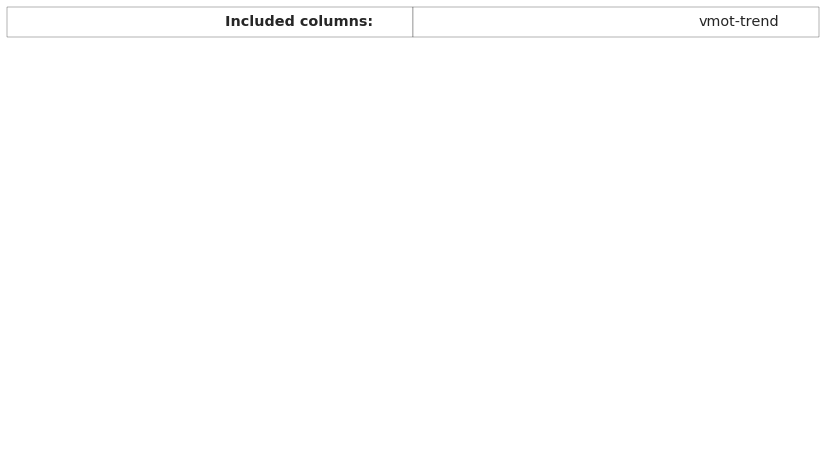

In [3]:
from moonchart import Tearsheet
Tearsheet.from_moonshot_csv("vmot_trend_backtest.csv")

***

## *Next Up*

Part 3: [VMOT Backtest](Part3-VMOT-Backtest.ipynb)